<a href="https://www.kaggle.com/code/widchyjoachim/payment-method-preference-analysis?scriptVersionId=218004484" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Payment Method Preference Analysis**

**Objective:** Explore customer preferences for payment methods and their relationship with transaction types.

**Analysis Steps:**
1. Calculate the proportion of each payment method (Credit Card, Cash, etc.) used across transactions.
2. Break down preferences by category, location, and spending amount.
3. Use chi-square tests or other statistical methods to determine if payment method preferences vary significantly by category or transaction size.
4. Visualize findings using pie charts, bar graphs, and stacked area charts.

**Deliverable:** A comprehensive analysis of payment method preferences with actionable insights for payment system optimization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Load the dataset
data=pd.read_csv("/kaggle/input/spending-habits/spending_patterns_detailed.csv")
data

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28
...,...,...,...,...,...,...,...,...,...
9995,CUST_0072,Housing and Utilities,Water Bill,1,69.46,69.46,Debit Card,Online,2023-09-01
9996,CUST_0150,Groceries,Snacks,5,15.54,77.70,Debit Card,In-store,2024-06-27
9997,CUST_0122,Shopping,Electronics,1,732.03,732.03,Debit Card,In-store,2024-03-19
9998,CUST_0133,Transportation,Car Repair,1,107.63,107.63,Debit Card,Mobile App,2024-10-17


In [2]:
# 1. Calculate the proportion of each payment method used across transactions
payment_proportions = data['Payment Method'].value_counts(normalize=True) * 100
print("Payment Method Proportions (%):")
payment_proportions

Payment Method Proportions (%):


Payment Method
Digital Wallet    25.60
Credit Card       24.99
Cash              24.78
Debit Card        24.63
Name: proportion, dtype: float64

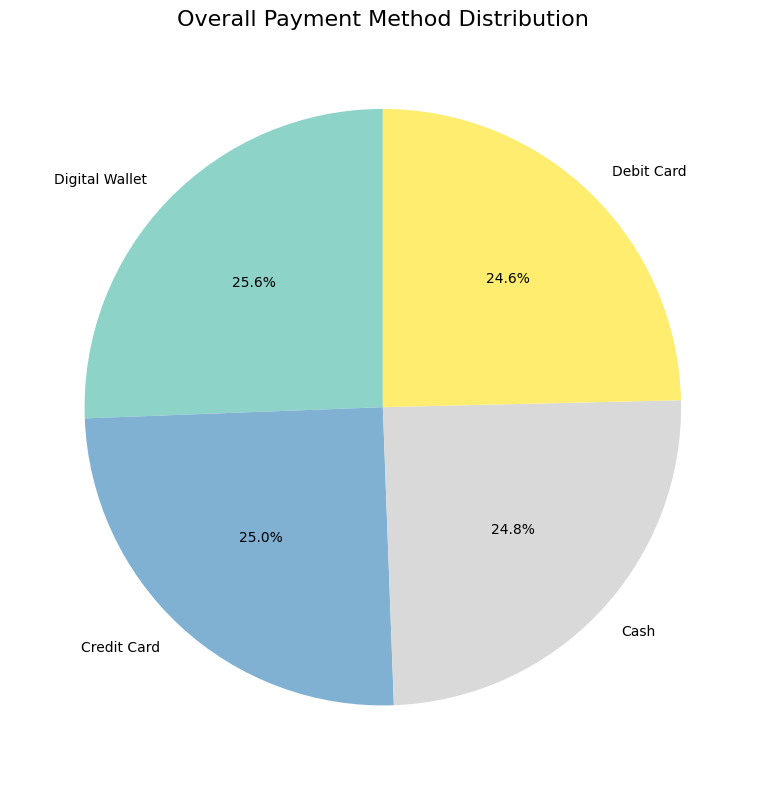

In [3]:
# Plot pie chart for overall payment method distribution
plt.figure(figsize=(8, 8))
payment_proportions.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3', ylabel="")
plt.title('Overall Payment Method Distribution', fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
# 2. Break down preferences by category, location, and spending amount
# a) Payment method by category
payment_by_category = data.groupby(['Category', 'Payment Method'])['Total Spent'].sum().unstack()
payment_by_category.fillna(0, inplace=True)
print("\nPayment Method Breakdown by Category:")
payment_by_category


Payment Method Breakdown by Category:


Payment Method,Cash,Credit Card,Debit Card,Digital Wallet
Category,,,,
Fitness,77671.29,91133.09,85078.11,82219.02
Food,13950.02,12001.93,14161.28,14566.83
Friend Activities,35103.55,40486.24,37332.26,37318.91
Gifts,59196.47,50132.89,62265.21,78412.01
Groceries,4468.61,4310.53,4227.24,4410.31
Hobbies,21631.24,20101.89,23136.34,19604.76
Housing and Utilities,164583.58,180363.93,217843.29,272600.83
Medical/Dental,66941.84,71724.38,80568.73,75474.15
Personal Hygiene,59121.52,69699.53,59696.53,51174.71


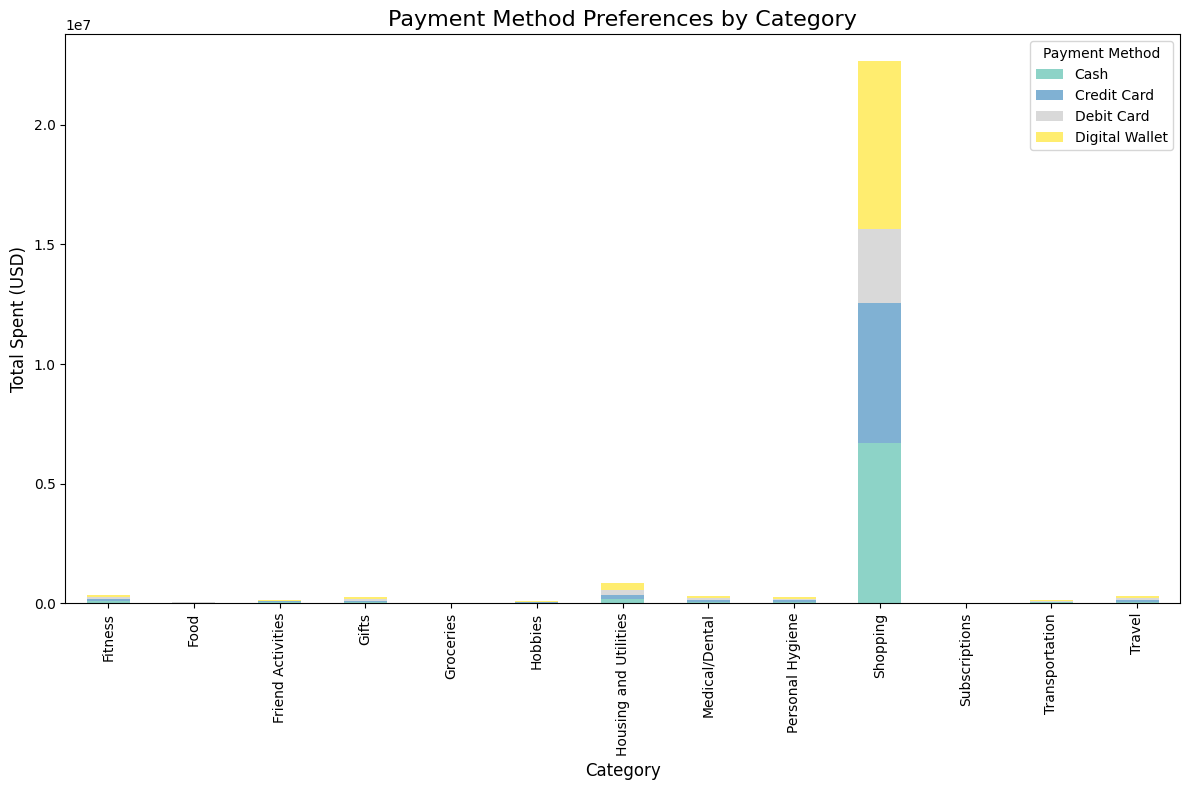

In [5]:
# Plot stacked bar chart for payment method by category
payment_by_category.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Payment Method Preferences by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Spent (USD)', fontsize=12)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

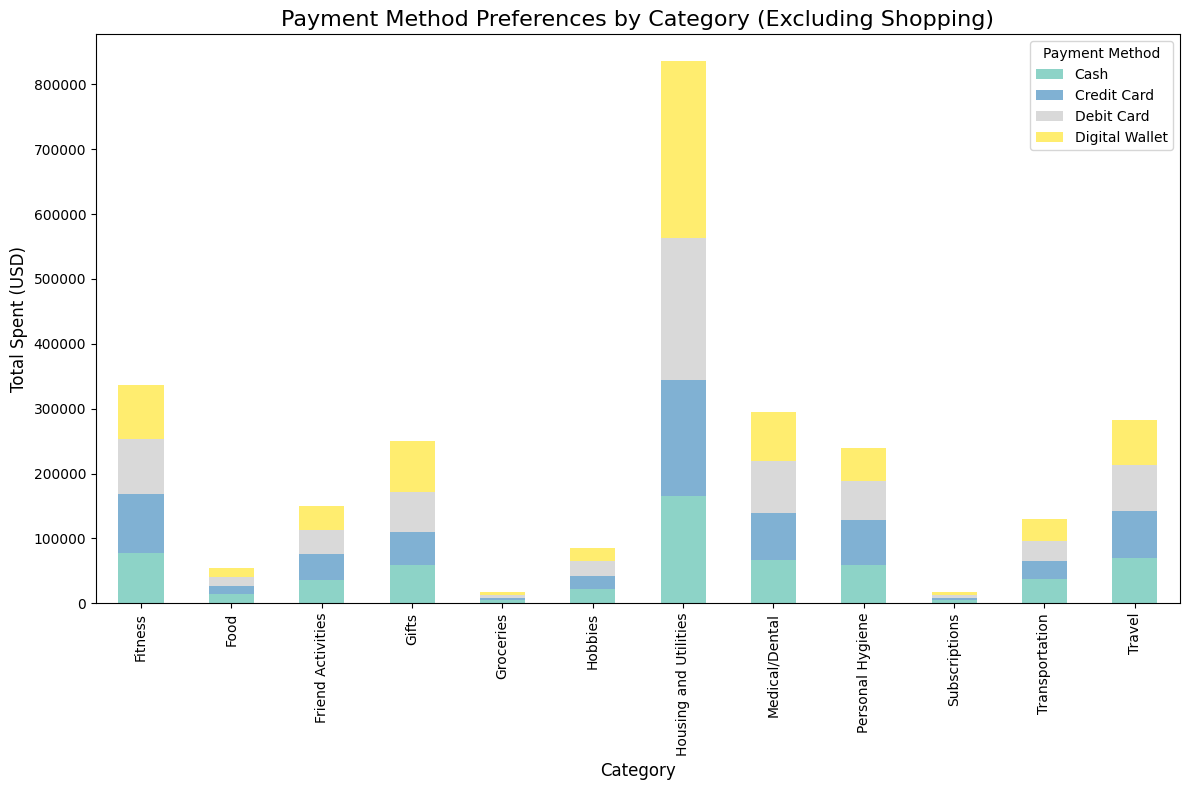

In [6]:
# Filter out the "Shopping" category
data_filtered = data[data['Category'] != 'Shopping']

# Recalculate payment method preferences by category (excluding Shopping)
payment_by_category_filtered = data_filtered.groupby(['Category', 'Payment Method'])['Total Spent'].sum().unstack()
payment_by_category_filtered.fillna(0, inplace=True)

# Plot stacked bar chart for payment method by category (excluding Shopping)
payment_by_category_filtered.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Payment Method Preferences by Category (Excluding Shopping)', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Spent (USD)', fontsize=12)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

In [7]:
# b) Payment method by location
payment_by_location = data.groupby(['Location', 'Payment Method'])['Total Spent'].sum().unstack()
payment_by_location.fillna(0, inplace=True)
print("\nPayment Method Breakdown by Location:")
payment_by_location


Payment Method Breakdown by Location:


Payment Method,Cash,Credit Card,Debit Card,Digital Wallet
Location,,,,
In-store,2810586.69,1737447.46,708986.45,2760249.70
Mobile App,1877602.19,2528510.72,1346215.01,2822074.01
Online,2605511.78,2265531.18,1712578.61,2172215.10


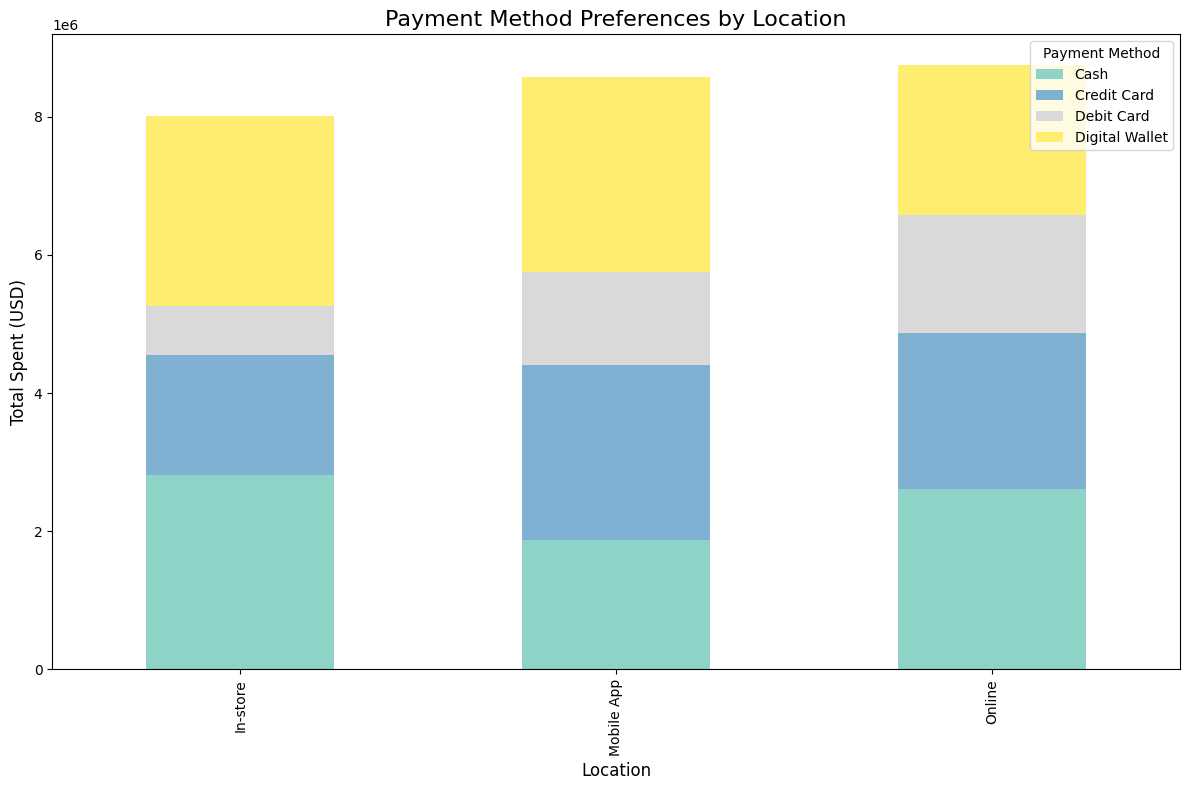

In [8]:
# Plot stacked bar chart for payment method by location
payment_by_location.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')
plt.title('Payment Method Preferences by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Spent (USD)', fontsize=12)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

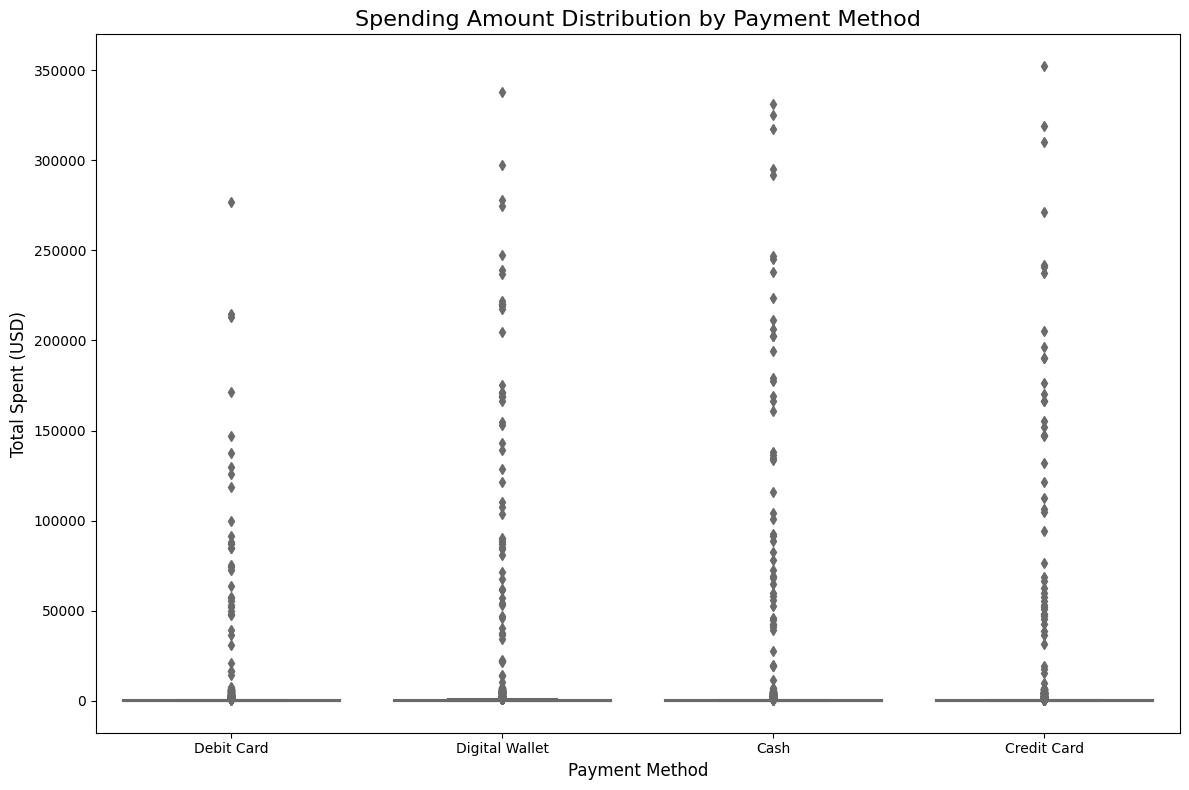

In [9]:
# c) Spending amount distribution by payment method
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Payment Method', y='Total Spent', palette='Set3')
plt.title('Spending Amount Distribution by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Spent (USD)', fontsize=12)
plt.tight_layout()
plt.show()

In [10]:
# 3. Statistical analysis: Chi-square test for relationship between payment method and category
contingency_table = pd.crosstab(data['Category'], data['Payment Method'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

if p < 0.05:
    print("Significant relationship between Payment Method and Category.")
else:
    print("No significant relationship between Payment Method and Category.")


Chi-Square Test Results:
Chi-Square Statistic: 38.76821123940141
P-value: 0.34590060811305157
Degrees of Freedom: 36
No significant relationship between Payment Method and Category.


In [11]:
# 4. Statistical analysis: Chi-square test for relationship between payment method and location
contingency_table_location = pd.crosstab(data['Location'], data['Payment Method'])
chi2_loc, p_loc, dof_loc, expected_loc = chi2_contingency(contingency_table_location)
print("\nChi-Square Test Results for Location:")
print(f"Chi-Square Statistic: {chi2_loc}")
print(f"P-value: {p_loc}")
print(f"Degrees of Freedom: {dof_loc}")

if p_loc < 0.05:
    print("Significant relationship between Payment Method and Location.")
else:
    print("No significant relationship between Payment Method and Location.")


Chi-Square Test Results for Location:
Chi-Square Statistic: 13.459011108486674
P-value: 0.03629904871310374
Degrees of Freedom: 6
Significant relationship between Payment Method and Location.


[**Widchy Joachim**](https://www.linkedin.com/in/widchyjoachim/)
 
 *Data Analyst*